In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

/home/reza/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [29]:
data_dir = "Data"
mnist_file = os.path.join(data_dir, "MNIST.txt")

In [30]:
# Define the directory and file path
data_dir = "Data"
mnist_file = os.path.join(data_dir, "MNIST.txt")

# Check for the existence of the directory and file
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")
else:
    print(f"Directory '{data_dir}' already exists.")

Directory 'Data' already exists.


In [31]:
if not os.path.exists(mnist_file):
    print(f"File '{mnist_file}' does not exist. It will be created.")
    
    # Load MNIST dataset
    print("Loading MNIST dataset from TensorFlow/Keras...")
    (x_train, y_train), _ = mnist.load_data()

    # Extract one example for each digit (0-9)
    unique_digits = list(range(10))
    selected_images = []
    for digit in unique_digits:
        idx = np.where(y_train == digit)[0][0]  # Find the first occurrence of the digit
        selected_images.append(x_train[idx])

    # Save the selected images and labels to MNIST.txt
    combined_data = np.hstack([np.array(selected_images).reshape(10, -1), np.array(unique_digits).reshape(-1, 1)])
    np.savetxt(mnist_file, combined_data, fmt='%d')
    print(f"Selected images saved to '{mnist_file}'.")
else:
    print(f"File '{mnist_file}' already exists. Skipping creation.")

File 'Data/MNIST.txt' does not exist. It will be created.
Loading MNIST dataset from TensorFlow/Keras...
Selected images saved to 'Data/MNIST.txt'.


In [32]:
# Load the selected images and labels from MNIST.txt
print(f"Loading data from '{mnist_file}'...")
data = np.loadtxt(mnist_file, dtype=int)
images = data[:, :-1].reshape(-1, 28, 28)  # All columns except the last are pixel values
labels = data[:, -1]  # Last column is the label

Loading data from 'Data/MNIST.txt'...


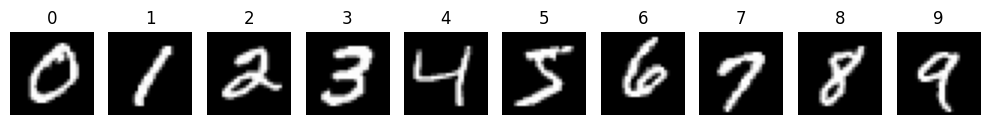

In [33]:
# Display the selected images in a subplot
plt.figure(figsize=(10, 2))
for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Define the directory and file path
data_dir = "Data"
mnist_file = os.path.join(data_dir, "MNIST.txt")

# Check for the existence of the directory and file
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")
else:
    print(f"Directory '{data_dir}' already exists.")

if not os.path.exists(mnist_file):
    print(f"File '{mnist_file}' does not exist. It will be created.")
    
    # Load MNIST dataset
    print("Loading MNIST dataset from TensorFlow/Keras...")
    (x_train, y_train), _ = mnist.load_data()

    # Extract one example for each digit (0-9)
    unique_digits = list(range(10))
    selected_images = []
    for digit in unique_digits:
        idx = np.where(y_train == digit)[0][0]  # Find the first occurrence of the digit
        selected_images.append(x_train[idx])

    # Save the selected images as 28x28 matrices (without flattening)
    with open(mnist_file, 'w') as f:
        for i, image in enumerate(selected_images):
            # Save each 28x28 image as a matrix
            np.savetxt(f, image, fmt='%d', delimiter=' ')
            f.write(f"Label: {unique_digits[i]}\n")  # Save label after each image
    
    print(f"Selected images saved to '{mnist_file}'.")
else:
    print(f"File '{mnist_file}' already exists. Skipping creation.")

# Load the selected images and labels from MNIST.txt
print(f"Loading data from '{mnist_file}'...")
selected_images = []
labels = []
with open(mnist_file, 'r') as f:
    lines = f.readlines()

# Read images and labels
for i in range(0, len(lines), 29):  # Each image is 28 lines, plus the label
    image = np.array([list(map(int, lines[i+j].split())) for j in range(28)])  # Convert image lines to 28x28 matrix
    label = int(lines[i+28].split(":")[1].strip())  # Extract label from the last line
    selected_images.append(image)
    labels.append(label)

# Display the selected images in a subplot
plt.figure(figsize=(10, 2))
for i, (image, label) in enumerate(zip(selected_images, labels)):
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Directory 'Data' already exists.
File 'Data/MNIST.txt' already exists. Skipping creation.
Loading data from 'Data/MNIST.txt'...


IndexError: list index out of range